# Deep Neural Network for MNIST Classification

We'll apply all the knowledge from the lectures in this section to write a deep neural network. The problem we've chosen is referred to as the "Hello World" of deep learning because for most students it is the first deep learning algorithm they see.

The dataset is called MNIST and refers to handwritten digit recognition. You can find more about it on Yann LeCun's website (Director of AI Research, Facebook). He is one of the pioneers of what we've been talking about and of more complex approaches that are widely used today, such as covolutional neural networks (CNNs). 

The dataset provides 70,000 images (28x28 pixels) of handwritten digits (1 digit per image). 

The goal is to write an algorithm that detects which digit is written. Since there are only 10 digits (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), this is a classification problem with 10 classes. 

Our goal would be to build a neural network with 2 hidden layers.

## Import the relevant packages

In [3]:
import numpy as np
import tensorflow as tf

# TensorFLow includes a data provider for MNIST that we'll use.
# It comes with the tensorflow-datasets module, therefore, if you haven't please install the package using
# pip install tensorflow-datasets 
# or
# conda install tensorflow-datasets

import tensorflow_datasets as tfds

# these datasets will be stored in C:\Users\*USERNAME*\tensorflow_datasets\...
# the first time you download a dataset, it is stored in the respective folder 
# every other time, it is automatically loading the copy on your computer 

/opt/anaconda3/envs/TFCourse/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data

That's where we load and preprocess our data.

In [5]:
# remember the comment from above
# these datasets will be stored in C:\Users\*USERNAME*\tensorflow_datasets\...
# the first time you download a dataset, it is stored in the respective folder 
# every other time, it is automatically loading the copy on your computer 

# tfds.load actually loads a dataset (or downloads and then loads if that's the first time you use it) 
# in our case, we are interesteed in the MNIST; the name of the dataset is the only mandatory argument
# there are other arguments we can specify, which we can find useful
# mnist_dataset = tfds.load(name='mnist', as_supervised=True)
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)
# with_info=True will also provide us with a tuple containing information about the version, features, number of samples
# we will use this information a bit below and we will store it in mnist_info

# as_supervised=True will load the dataset in a 2-tuple structure (input, target) 
# alternatively, as_supervised=False, would return a dictionary
# obviously we prefer to have our inputs and targets separated 

In [6]:
mnist_dataset

{'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [7]:
mnist_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/Users/joaogouveiaml/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",


In [8]:
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

In [9]:
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.
    return image, label

scaled_train_and_validation_data = mnist_train.map(scale)
test_data = mnist_test.map(scale)

BUFFER_SIZE = 10000

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)
test_data = test_data.batch(num_test_samples)

BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)

validation_inputs, validation_targets = next(iter(validation_data))

2025-05-16 06:59:39.380021: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-05-16 06:59:39.534773: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


## Model

### Outline the model

In [12]:
input_size = 784
output_size = 10
hidden_layer_size = 100

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28, 1)), # transforms each image in a flat vector
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # find the dot product of inputs and weights and add bias
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax') # softmax as we want to tranform the output into probabilities of being one of the numbers on dataset
])

/opt/anaconda3/envs/TFCourse/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Choose the optimizer and the loss function

In [14]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Training

In [16]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=2, restore_best_weights=True)

NUM_EPOCHS = 10

model.fit(train_data, epochs = NUM_EPOCHS, validation_data = (validation_inputs, validation_targets), verbose = 2, callbacks=[early_stop])

Epoch 1/10
540/540 - 1s - 2ms/step - accuracy: 0.9060 - loss: 0.3350 - val_accuracy: 0.9480 - val_loss: 0.1852
Epoch 2/10
540/540 - 1s - 1ms/step - accuracy: 0.9578 - loss: 0.1399 - val_accuracy: 0.9632 - val_loss: 0.1290
Epoch 3/10
540/540 - 1s - 1ms/step - accuracy: 0.9700 - loss: 0.0989 - val_accuracy: 0.9707 - val_loss: 0.0999
Epoch 4/10
540/540 - 1s - 1ms/step - accuracy: 0.9774 - loss: 0.0755 - val_accuracy: 0.9770 - val_loss: 0.0782
Epoch 5/10
540/540 - 1s - 1ms/step - accuracy: 0.9818 - loss: 0.0597 - val_accuracy: 0.9818 - val_loss: 0.0685
Epoch 6/10
540/540 - 1s - 1ms/step - accuracy: 0.9850 - loss: 0.0491 - val_accuracy: 0.9837 - val_loss: 0.0626
Epoch 7/10
540/540 - 1s - 1ms/step - accuracy: 0.9874 - loss: 0.0403 - val_accuracy: 0.9862 - val_loss: 0.0535
Epoch 8/10
540/540 - 1s - 1ms/step - accuracy: 0.9891 - loss: 0.0347 - val_accuracy: 0.9857 - val_loss: 0.0491
Epoch 9/10
540/540 - 1s - 1ms/step - accuracy: 0.9915 - loss: 0.0263 - val_accuracy: 0.9872 - val_loss: 0.0419
E

### Test the model

In [18]:
test_loss, test_accuracy = model.evaluate(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9758 - loss: 0.0808


In [19]:
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}% '.format(test_loss, test_accuracy * 100.))

Test loss: 0.08. Test accuracy: 97.58% 


### Personal test

In [21]:
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
from PIL import ImageOps
from PIL import ImageEnhance

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


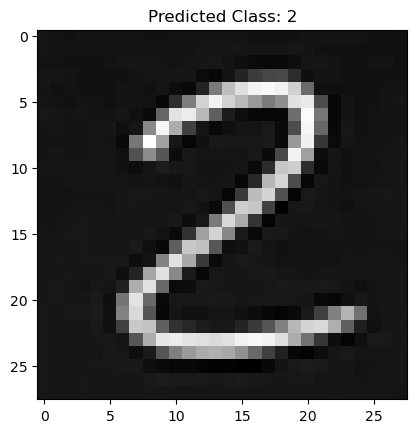

The model predicts this is a 2


In [22]:
# Função para carregar e preparar a imagem
def load_and_prepare_image(image_path):
    img = Image.open(image_path).convert('L')

    # Aplicar autocontraste
    img = ImageOps.autocontrast(img)

    # Verifique visualmente se precisa inverter
    img = ImageOps.invert(img)  # Remova se sua imagem já for branco no preto

    # Reduzir mantendo a proporção
    img.thumbnail((28, 28), Image.Resampling.LANCZOS)

    # Normalizar e expandir dims
    img_array = np.array(img).astype('float32') / 255.0
    img_array = np.expand_dims(img, axis=(0, -1))  # (1, 28, 28, 1)

    return img_array

# Caminho da sua imagem
image_path = 'my2_2.png'

# Carregar e preparar a imagem
img_array = load_and_prepare_image(image_path)

# Fazer a previsão
predictions = model.predict(img_array)

print(predictions)

# Obter a classe com maior probabilidade
predicted_class = np.argmax(predictions)

# Exibir a imagem e o resultado
plt.imshow(img_array[0], cmap='gray')
plt.title(f'Predicted Class: {predicted_class}')
plt.show()

print(f'The model predicts this is a {predicted_class}')

## Converting model to tf lite to use on Android app

In [39]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


# Save the model.
with open('mnist-jg.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/y2/th9j6g7n1wgghjg95sgj0cqr0000gq/T/tmp_avx5z7_/assets


INFO:tensorflow:Assets written to: /var/folders/y2/th9j6g7n1wgghjg95sgj0cqr0000gq/T/tmp_avx5z7_/assets


Saved artifact at '/var/folders/y2/th9j6g7n1wgghjg95sgj0cqr0000gq/T/tmp_avx5z7_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  12997942480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12997943248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12997943056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12997943824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12997943632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12997942672: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1747375289.040642   24185 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1747375289.040653   24185 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-05-16 07:01:29.040851: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/y2/th9j6g7n1wgghjg95sgj0cqr0000gq/T/tmp_avx5z7_
2025-05-16 07:01:29.041116: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-05-16 07:01:29.041120: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/y2/th9j6g7n1wgghjg95sgj0cqr0000gq/T/tmp_avx5z7_
I0000 00:00:1747375289.042590   24185 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-05-16 07:01:29.042823: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-05-16 07:01:29.051498: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folder